In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import h5py
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.callbacks import TensorBoard, ModelCheckpoint
import datetime

import numpy as np

def get_file_name ():
    now = datetime.datetime.now()
    return "%d%d%d-%d%d" % (now.year, now.month, now.day, now.hour, now.minute)

def get_tensor_board () :
    return TensorBoard(log_dir='./logs/' + get_file_name()  + '/', histogram_freq=0,
                          write_graph=True, write_images=False)


import scipy.io
# labelMat = scipy.io.loadmat('utils/imagelabels.mat')

## Configure everything (hard coded .a.t.m.)
nr_labels = 5 
batch_size = 32
nr_epochs = 2
num_samples = 3620
num_valid_samples = 50


Using TensorFlow backend.


Found 3620 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Image batch shape:  (32, 150, 150, 3)
Labe batch shape:  (32, 5)


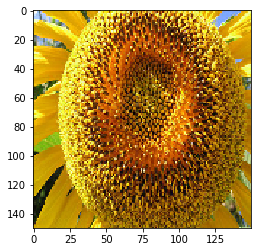

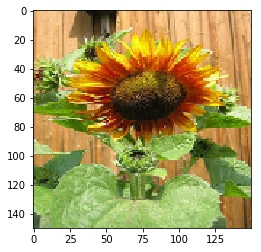

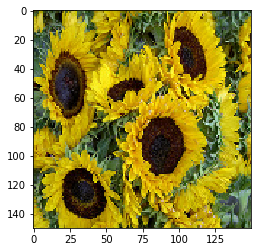

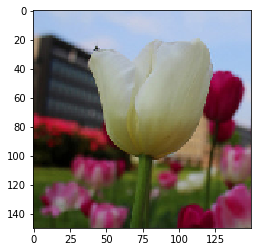

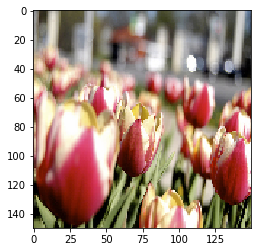

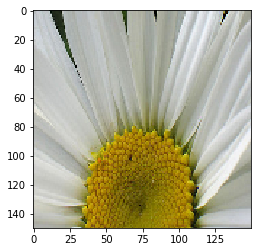

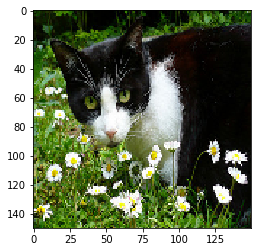

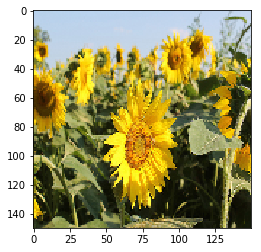

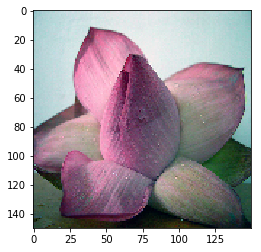

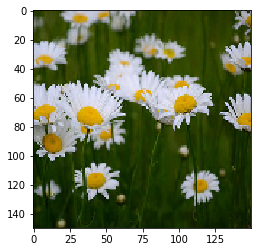

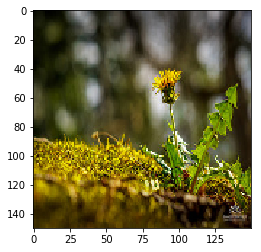

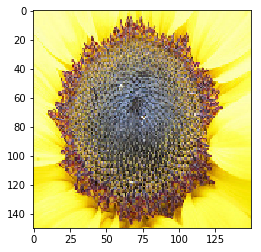

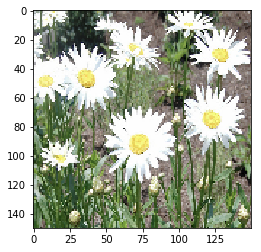

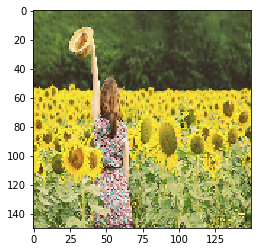

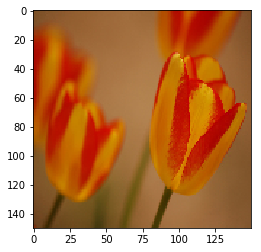

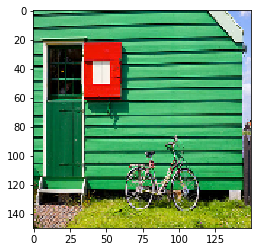

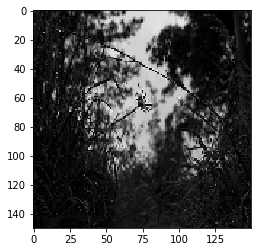

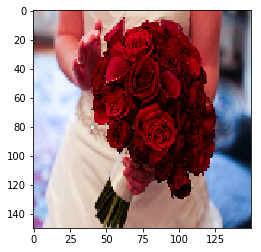

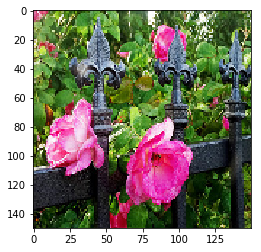

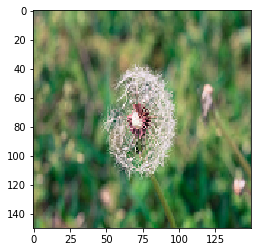

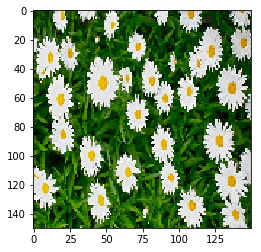

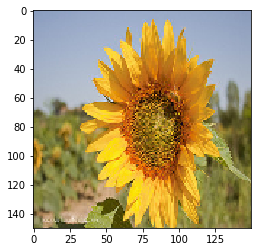

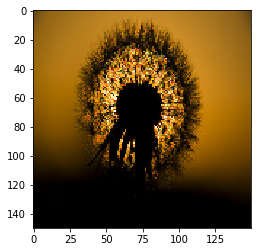

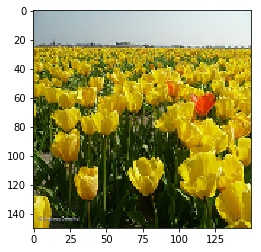

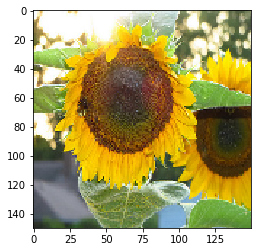

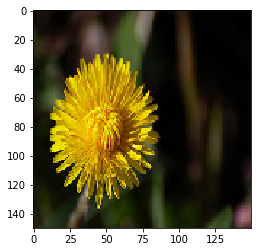

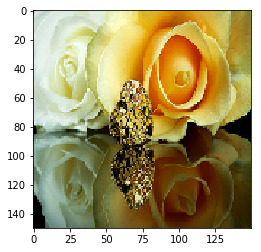

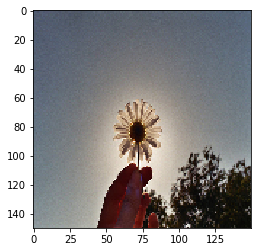

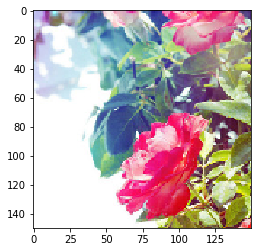

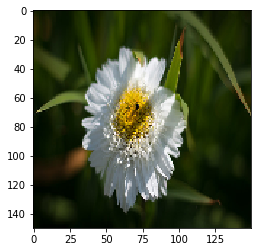

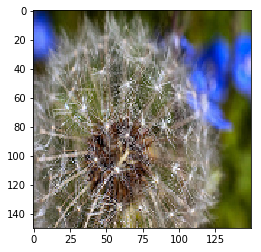

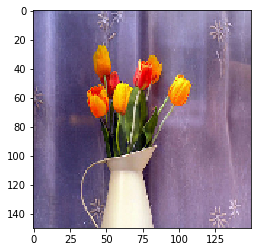

In [2]:
def get_generator (folder, batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)

    train_generator = train_datagen.flow_from_directory(
        folder,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    
    return train_generator
train_generator = get_generator('flower_photos_splitted/train', batch_size=batch_size)
valid_generator = get_generator('flower_photos_splitted/valid', batch_size=batch_size)

for image_batch,label_batch in valid_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  for image in image_batch:
    plt.imshow(image)
    plt.show()
  break

In [3]:

def get_model ():
    base_model = InceptionV3(weights='imagenet', include_top=False)

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    # and a logistic layer -- let's say we have 200 classes
    predictions = Dense(nr_labels, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in model.layers[:1]:
        layer.trainable = False
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


model = get_model()
# model.load_weights('saved_models/20190411-fine-tuning.h5') 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
_____________________________________

In [ ]:

print('evaluate')
loss = model.evaluate_generator(valid_generator, 
                    steps= num_valid_samples / batch_size)
print(loss)



evaluate
[2.3260267639160155, 0.3000000047683716]


dandelion


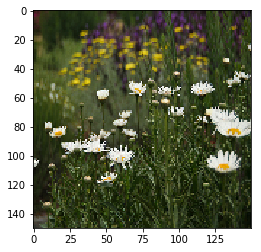

dandelion


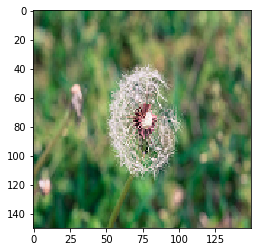

dandelion


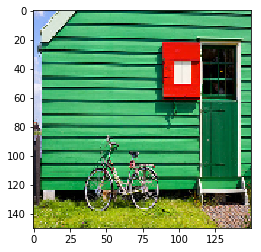

daisy


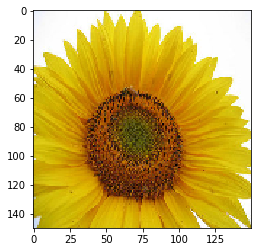

tulips


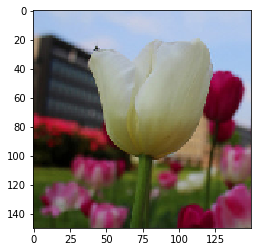

daisy


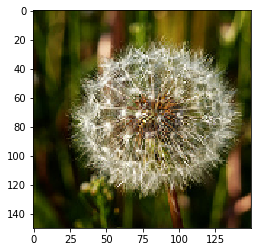

dandelion


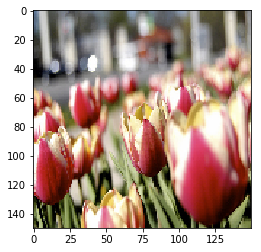

daisy


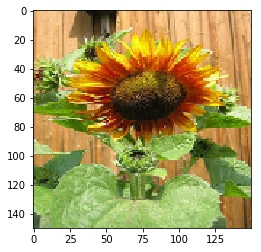

dandelion


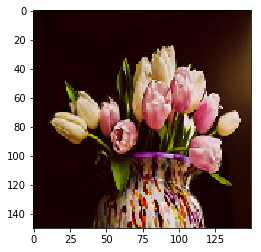

dandelion


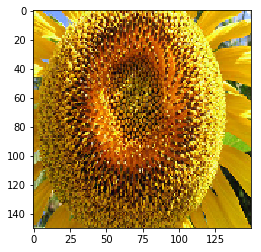

daisy


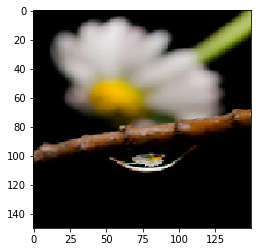

daisy


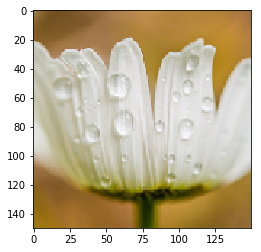

dandelion


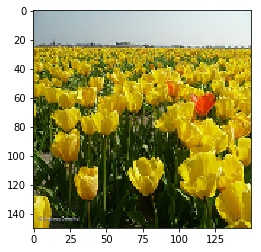

dandelion


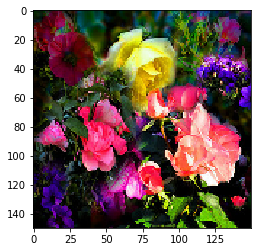

dandelion


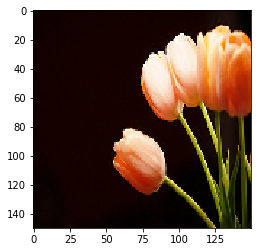

dandelion


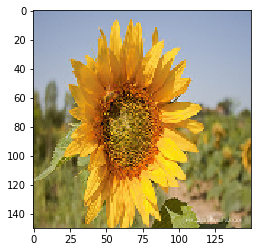

tulips


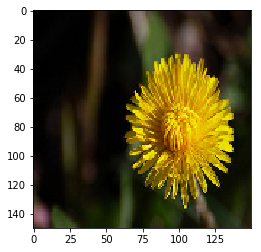

daisy


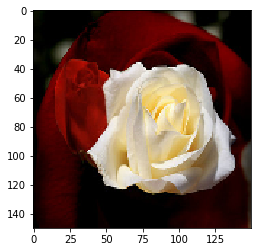

dandelion


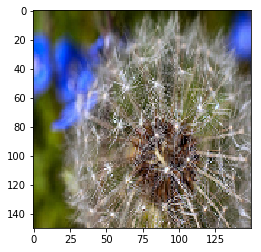

dandelion


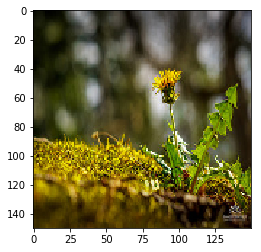

dandelion


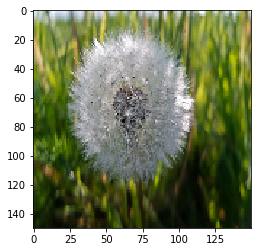

dandelion


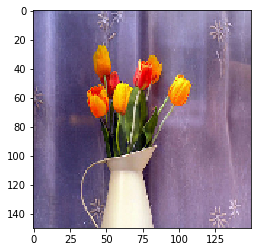

daisy


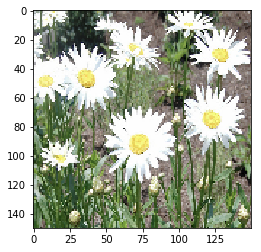

dandelion


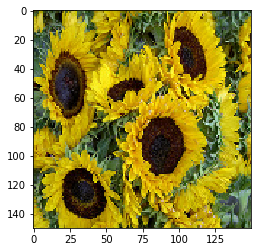

daisy


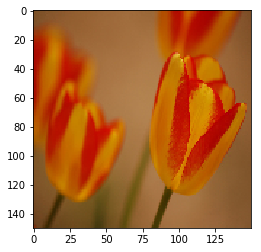

daisy


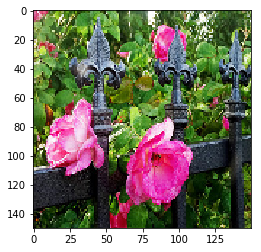

daisy


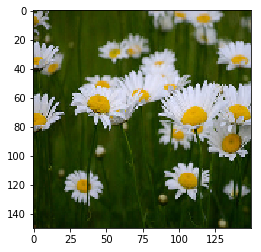

daisy


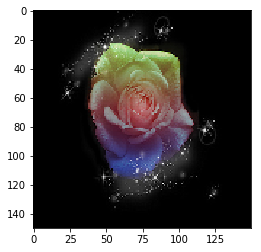

tulips


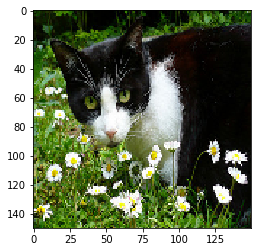

daisy


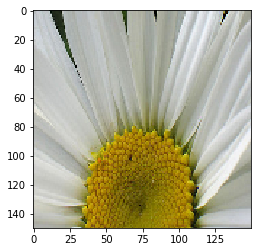

daisy


daisy


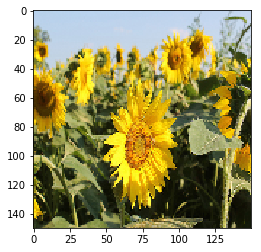

In [ ]:
classes = valid_generator.classes
class_indices = valid_generator.class_indices
class_names = {}
for k, v in class_indices.items():
    class_names[v] = k
    
for image_data, something_else in valid_generator:
    res = model.predict(image_data)
    for index, image in enumerate(image_data):
        predicted_class = np.argmax(res[index], axis=-1)
        print(class_names[predicted_class])
        plt.imshow(image)
        plt.show()
    break

In [ ]:

print('train')
model.fit_generator(train_generator, 
                    epochs=100,
                    steps_per_epoch= num_samples / batch_size, 
                    validation_data=valid_generator,
                    validation_steps = num_valid_samples / batch_size,
                    callbacks=[
                        get_tensor_board(),
                        ModelCheckpoint('models/%s.h5'% get_file_name(), verbose=1, save_best_only=True)
                    ])



train
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 11/113 [=>............................] - ETA: 12:54 - loss: 2.0659 - acc: 0.3636

In [ ]:
model.evaluate_generator(generator=valid_generator, steps= num_valid_samples / batch_size)

In [ ]:
model.predict_generator()